In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [15]:
adult_data = pd.read_csv(
    "data/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
adult_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [19]:
adult_data = adult_data.dropna()
adult_data.Target.value_counts()

<=50K    22654
>50K      7508
Name: Target, dtype: int64

In [5]:
import umap

In [6]:
reducer = umap.UMAP()

In [18]:
adult_data_values = adult_data[
    [
        "Age",
        "fnlwgt",
        "Education-Num",
        "Capital Gain",
        "Capital Loss",
        "Hours per week",
    ]
].values
scaled_adult_data = StandardScaler().fit_transform(adult_data_values)

In [13]:
embedding = reducer.fit_transform(scaled_adult_data)
embedding.shape

(30162, 2)

ValueError: 'c' argument has 32561 elements, which is not acceptable for use with 'x' with size 30162, 'y' with size 30162.

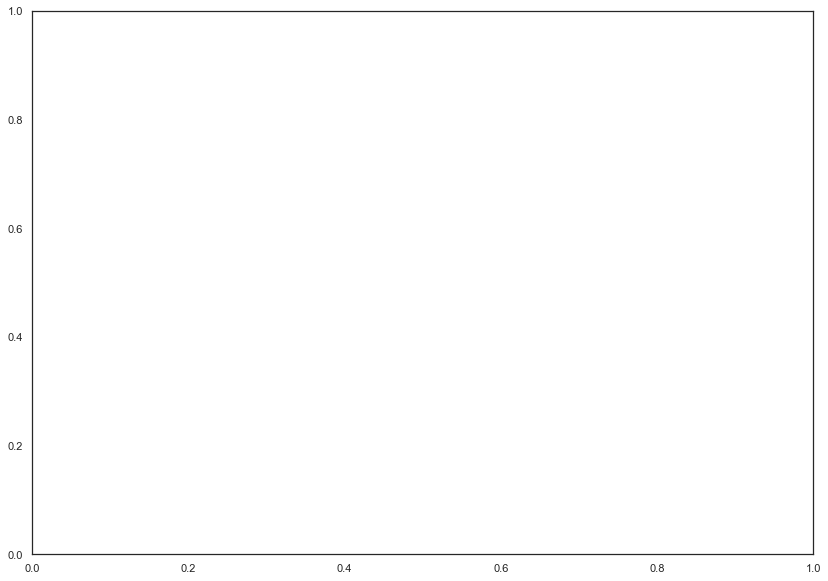

In [16]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in adult_data.Target.map({"<=50K":0, ">50K":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Adult dataset', fontsize=24)

In [20]:
sc.scatter(np.arange(len(adult_data_values)), adult_data_values, c = colors/255)

NameError: name 'sc' is not defined